# Dow Jones Index Data Set

This dataset contains weekly data from Q1 and Q2 2011 for the companies within the Dow Jones Industrial Index. It has been used in computational investing research.

Source:

http://archive.ics.uci.edu/ml/datasets/Dow+Jones+Index#

In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib as mtp
import matplotlib.pyplot as plt
from scipy.stats import linregress as linr
%matplotlib inline

## The Data
The table features attributes for each company, all calculated and/or recorded at the close of the market each Friday. Some attributes are simple like price and total volume (amount of shares bought and sold) while others are of analytical interest like days to next dividend and percent change next week's price.

In [2]:
# Import time-series dataset converted from .data to .csv and display
# header data
dji_2011 = pd.read_csv('dow_jones_index.csv')
print(dji_2011.dtypes)
dji_2011.head()

quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object


,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


## Visualizing the Johnson & Johnson Stock
To reduce clutter and simplify observations, Johnson & Johnson was chosen after browsing the table and noticing their relatively high percent return next dividend values. The visualizations shown are the following:

- Figure 1: Line plot of all basic stock attributes over time
  * a: Prices
    * Open
    * High
    * Low
    * Close
  * b: Volume


- Figure 2: Boxplots of days to next dividend and percent return on next dividend


- Figure 3: Scatter Plots of price changes against volume attribues
  * a: Previous week's price change against current week's volume change
  * b: Previous week's price change against current week's volume

In [3]:
# Extract JNJ from the data frame and convert its data from strings to
# appropriate types for plotting. Reassign indices to begin at 0
jnj_2011 = dji_2011.loc[lambda df: dji_2011['stock'] == 'JNJ']
print(jnj_2011.dtypes)
jnj_2011.head()

quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object


,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
168,1,JNJ,1/7/2011,$62.63,$63.54,$62.53,$62.60,57774737,-0.047900,NaN,NaN,$62.29,$62.55,0.417402,49,0.862620
169,1,JNJ,1/14/2011,$62.29,$62.98,$62.00,$62.55,34950419,0.417402,-39.505706,57774737.0,$62.21,$62.66,0.723356,42,0.863309
170,1,JNJ,1/21/2011,$62.21,$63.25,$62.01,$62.66,47999880,0.723356,37.337066,34950419.0,$62.56,$60.01,-4.076090,35,0.861794
171,1,JNJ,1/28/2011,$62.56,$62.72,$60.00,$60.01,86229071,-4.076090,79.644347,47999880.0,$60.16,$60.84,1.130320,28,0.899850
172,1,JNJ,2/4/2011,$60.16,$60.99,$59.69,$60.84,63641929,1.130320,-26.194347,86229071.0,$60.88,$60.70,-0.295664,21,0.887574


In [4]:
# Convert incorrect data types to appropriate types for plotting and
# store in a dictionary for easy access.
jnj_2011_dict = {'open': [], 'high': [], 'low': [], 'close': [], 'volume': [],'date': []}

for index in jnj_2011.index:
    jnj_2011_dict['open'].append(float(jnj_2011.loc[index, 'open'][1:]))
    jnj_2011_dict['high'].append(float(jnj_2011.loc[index, 'high'][1:]))
    jnj_2011_dict['low'].append(float(jnj_2011.loc[index, 'low'][1:]))
    jnj_2011_dict['close'].append(float(jnj_2011.loc[index, 'close'][1:]))
    jnj_2011_dict['date'].append(pd.to_datetime(jnj_2011.loc[index, 'date']))

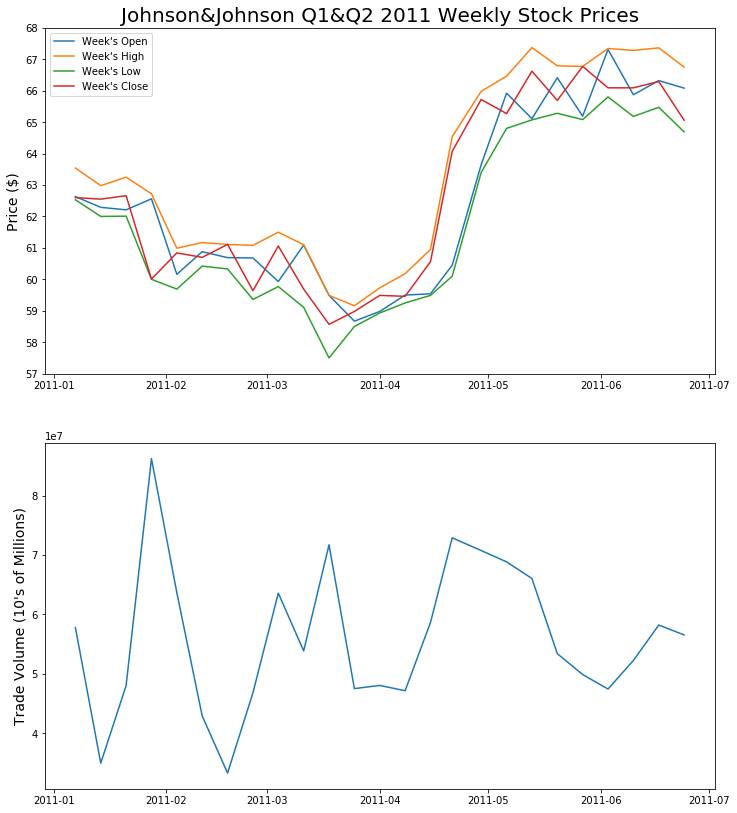

In [5]:
# Plot JNJ weekly open, high, low, and close prices on top of the volume
plt.figure(figsize=(12, 14))
plt.subplot(2, 1, 1)
plt.plot(jnj_2011_dict['date'], jnj_2011_dict['open'], label='Week\'s Open')
plt.plot(jnj_2011_dict['date'], jnj_2011_dict['high'], label='Week\'s High')
plt.plot(jnj_2011_dict['date'], jnj_2011_dict['low'], label='Week\'s Low')
plt.plot(jnj_2011_dict['date'], jnj_2011_dict['close'], label='Week\'s Close')
plt.ylim([57, 68])
plt.ylabel('Price ($)', fontsize=14)
plt.title('Johnson&Johnson Q1&Q2 2011 Weekly Stock Prices',fontsize=20)
plt.yticks(np.arange(57, 69, 1))
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(jnj_2011_dict['date'], jnj_2011['volume'])
plt.ylabel('Trade Volume (10\'s of Millions)', fontsize=14)
plt.show()

### Stock Prices and Volume Plot Analysis
The plots show that during February 2011, the highest volume of the two quarters occurred but caused the largest price decrease in the shortest period, ~5%, so these were mostly sells. By March the volume had nearly decreased by 2/3 though the price was relatively flat, but a rebound in volume of almost double during the 1st half of the month only caused a short-lived recovery of less than 2%.

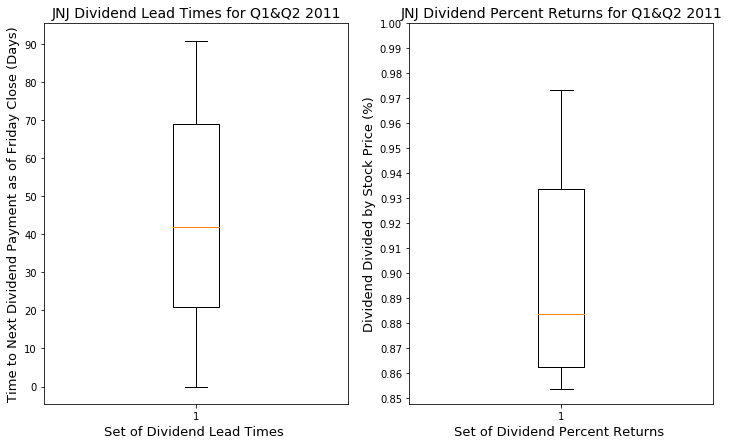

In [6]:
# Plot JNJ's days to next dividend and percent return calculated from
# the same dividends in a boxplot
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.boxplot(jnj_2011['days_to_next_dividend'])
plt.ylabel('Time to Next Dividend Payment as of Friday Close (Days)', fontsize=13)
plt.yticks(np.arange(0, 100, 10))
plt.title('JNJ Dividend Lead Times for Q1&Q2 2011', fontsize=14)
plt.xlabel('Set of Dividend Lead Times ', fontsize=13)

plt.subplot(1, 2, 2)
plt.boxplot(jnj_2011['percent_return_next_dividend'])
plt.ylabel('Dividend Divided by Stock Price (%)', fontsize=13)
plt.yticks(np.arange(0.85, 1, 0.01))
plt.title('JNJ Dividend Percent Returns for Q1&Q2 2011', fontsize=14)
plt.xlabel('Set of Dividend Percent Returns ', fontsize=13)
plt.show()

### Dividend Boxplot Analysis
The properties of pyplot make it clear that no value for either plot are significant outliers since datapoints do not appear on the plot (> 1.5IQR). Percent returns from JNJ are fairly stable and predictable but the 75th percentile is nearly 4 times the 25th percentile. The percent returns appear to be clustered towards the lower end of the plot since the median is not in the middle of the box and the lower whisker is not far from the 25th percentile. 

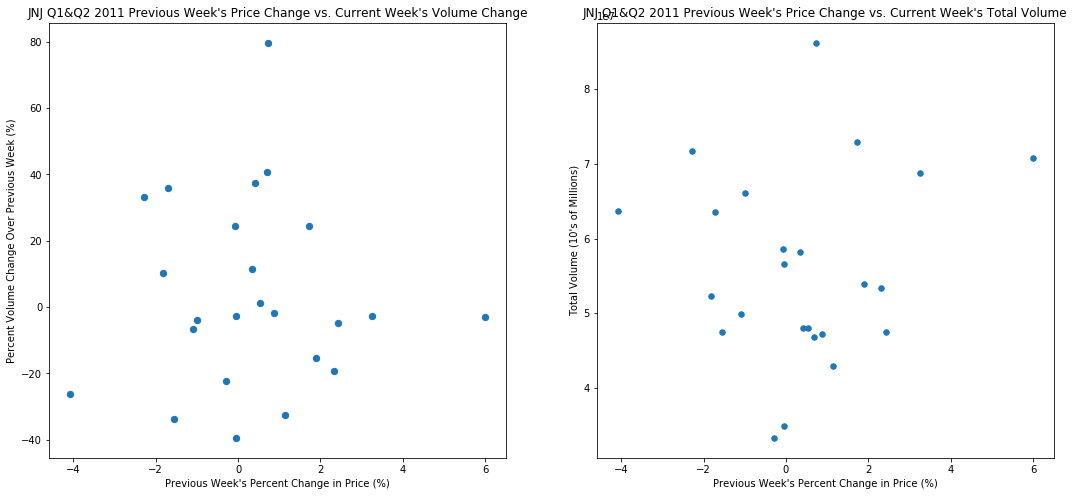

In [8]:
# Scatter plot of last weeks price change versus this week's total volume
# and volume change.
# Price change starts at 1/7/2011 and volume values start at 1/14/2011
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.scatter(x=jnj_2011['percent_change_price'].drop(554), y=jnj_2011['percent_change_volume_over_last_wk'].drop(168), s=40)
plt.ylabel('Percent Volume Change Over Previous Week (%)', fontsize=10)
plt.xlabel('Previous Week\'s Percent Change in Price (%)')
plt.title('JNJ Q1&Q2 2011 Previous Week\'s Price Change vs. Current Week\'s Volume Change', fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(x=jnj_2011['percent_change_price'].drop(554), y=jnj_2011['volume'].drop(168), s=30)
plt.ylabel('Total Volume (10\'s of Millions)', fontsize=10)
plt.xlabel('Previous Week\'s Percent Change in Price (%)')
plt.title('JNJ Q1&Q2 2011 Previous Week\'s Price Change vs. Current Week\'s Total Volume', fontsize=12)
plt.show()

### Price vs. Volume Scatter Plot Analysis
There is not a correlation/association between the previous week's price change and current week's volume parameters. So week-to-week positive price changes do not tend preceed positive volume changes and the same for negative. There is a vertical clustering along the x = 0 vertical line, with nearly equal amounts of data points on either side. It appears that throughout half the year in 2011, volume activity caused fluctuations between -2% and 2% week-over-week changes, but outlier activity pushed the price up ~3% during the period.